In [8]:
import matplotlib.pyplot as plt

In [1]:
from GenomicTools.tools import *
from GenomicTools.tandem_duplications import *
from GenomicTools.synteny import *

In [2]:
d_spA, d_spB, dot_plot, d_labels = load_dot_plot('Giraffa_camelopardalis-Okapia_johnstoni-dotplot_v2.csv')
spA, species_data_A, labels_A, chrom_info_A = load_species_data('Giraffa_camelopardalis_data.csv')
spB, species_data_B, labels_B, chrom_info_B = load_species_data('Okapia_johnstoni_data.csv')

In [3]:
params = {}
params['tandem_windowsize'] = 1
params['nanosynteny_convolution_kernel_size'] = 3
params['dot_maxdist'] = 5
params['condensed_block_minsize'] = 2
params['condensed_block_minsize'] = 3
params['block_minsize'] = 3
params['block_overlap_threshold'] = 2
params['large_block_dot_threshold'] = 2
params['max_iterations'] = 20

In [4]:
blocks = run_synteny_identification_v2(dot_plot,species_data_A,species_data_B,chrom_info_A,chrom_info_B,params)

In [6]:
h = np.unique([b.shape[0] for b in blocks],return_counts=True)

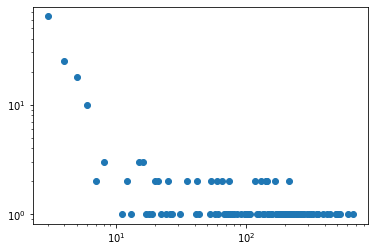

In [9]:
plt.scatter(h[0],h[1])
plt.xscale('log')
plt.yscale('log')

In [7]:
maps_A = create_shift_map(species_data_A, 1)
maps_B = create_shift_map(species_data_B, 1)
cc_maps_A, inv_cc_maps_A, shift_maps_A, unshift_maps_A = maps_A
cc_maps_B, inv_cc_maps_B, shift_maps_B, unshift_maps_B = maps_B

In [8]:
unshifted_blocks = unshift_synteny_blocks(blocks,maps_A,maps_B)

In [9]:
unshifted_blocks_int = []
for b in unshifted_blocks:
    block_int = []
    for i in b:
        block_int.append(np.array([chrom_info_A[i[0]]['number'],i[1],chrom_info_B[i[2]]['number'],i[3]]).astype(int))
    unshifted_blocks_int.append(np.vstack(block_int))

In [10]:
fixed_blocks = fix_blocks(unshifted_blocks_int, params['block_minsize'], params['block_overlap_threshold'], params['large_block_dot_threshold'])

In [18]:
fixed_blocks

[array([[  1, 548,   9, 177],
        [  1, 549,   9, 176],
        [  1, 550,   9, 175]]),
 array([[  1, 644,  10, 230],
        [  1, 648,  10, 232],
        [  1, 649,  10, 233],
        [  1, 650,  10, 235],
        [  1, 651,  10, 236],
        [  1, 652,  10, 237],
        [  1, 653,  10, 239],
        [  1, 655,  10, 240],
        [  1, 657,  10, 241],
        [  1, 658,  10, 242],
        [  1, 659,  10, 243],
        [  1, 660,  10, 244],
        [  1, 661,  10, 245],
        [  1, 662,  10, 246],
        [  1, 663,  10, 247],
        [  1, 664,  10, 248],
        [  1, 665,  10, 249],
        [  1, 666,  10, 250],
        [  1, 668,  10, 251],
        [  1, 669,  10, 253],
        [  1, 670,  10, 254],
        [  1, 671,  10, 255],
        [  1, 672,  10, 256],
        [  1, 673,  10, 257],
        [  1, 674,  10, 258],
        [  1, 675,  10, 259],
        [  1, 676,  10, 260],
        [  1, 677,  10, 261],
        [  1, 679,  10, 262],
        [  1, 680,  10, 264],
        

In [12]:
h = np.unique([b.shape[0] for b in fixed_blocks],return_counts=True)

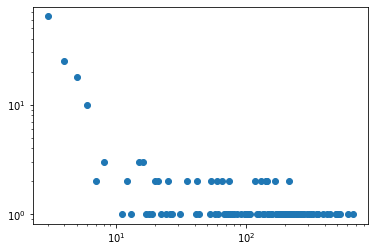

In [15]:
plt.scatter(h[0],h[1])
plt.xscale('log')
plt.yscale('log')

In [17]:
np.sum(h[0]*h[1])

18925

In [12]:
block = blocks[0]

In [8]:
unshifted_synteny_blocks = []
for block in blocks:
    block = block[np.argsort(block[:,1]).astype(int)]
    slope = block_slope(block)
    chromA, chromB = block[0,np.array([0,2])]
    unshifted_dots_A = []
    unshifted_dots_B = []
    half_block_size = (block.shape[0]/2.)
    for nb, b in enumerate(block):
        cc_block_A = inv_cc_maps_A[chromA][unshift_maps_A[chromA][int(b[1])]]
        cc_block_B = inv_cc_maps_B[chromB][unshift_maps_B[chromB][int(b[3])]]
        dimA = cc_block_A.shape[0]
        dimB = cc_block_B.shape[0]
        if (dimA == 1) and (dimB == 1):
            unshifted_dots_A.append(cc_block_A[0])
            unshifted_dots_B.append(cc_block_B[0])
        else:
            dim = np.min([dimA, dimB])
            if (slope < 0) and (nb > half_block_size):
                unshifted_dots_A += list(np.sort(cc_block_A)[:dim])
                unshifted_dots_B += list(np.sort(cc_block_B)[:dim][::-1])
            elif (slope < 0) and (nb <= half_block_size):
                unshifted_dots_A += list(np.sort(cc_block_A)[-dim:])
                unshifted_dots_B += list(np.sort(cc_block_B)[-dim:][::-1])
            elif (slope > 0) and (nb > half_block_size):
                unshifted_dots_A += list(np.sort(cc_block_A)[:dim])
                unshifted_dots_B += list(np.sort(cc_block_B)[:dim])
            elif (slope > 0) and (nb <= half_block_size):
                unshifted_dots_A += list(np.sort(cc_block_A)[-dim:])
                unshifted_dots_B += list(np.sort(cc_block_B)[-dim:])
            else:
                raise ValueError("Something is up with this synteny block.")
#     unshifted_dots_A = np.array(unshifted_dots_A)
#     unshifted_dots_B = np.array(unshifted_dots_B)
#     unshifted_length = unshifted_dots_A.shape[0]
#     unshifted_block = np.vstack([np.array(unshifted_length*[chromA]),unshifted_dots_A,np.array(unshifted_length*[chromB]),unshifted_dots_B]).T
#     unshifted_synteny_blocks.append(unshifted_block)

ValueError: Something is up with this synteny block.

In [13]:
block_slope(block[:,np.array([1,3])].astype(int))

IndexError: index 3 is out of bounds for axis 1 with size 2

In [15]:
    x = block[:,1].astype(int)
    y = block[:,3].astype(int)
    slope = (y[-1] - y[0]) - (x[-1] - x[0])

In [17]:
x

array([616, 617, 618, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632,
       633, 634, 635, 636, 637, 638, 639, 640, 641, 642])

KeyError: '519'

In [14]:
import matplotlib.pyplot as plt

In [39]:
test = dot_plot[(dot_plot[:,0] == 'HiC_scaffold_1')*(dot_plot[:,2] == 'HiC_scaffold_4')][:,np.array([1,3])].astype(int)

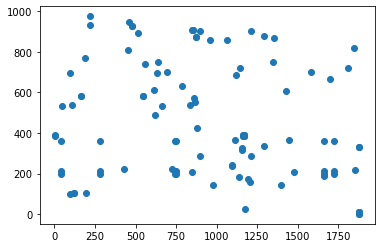

In [40]:
plt.scatter(test[:,0],test[:,1])

In [24]:
test

array([[   2,    1],
       [   4,    3],
       [   5,    3],
       ...,
       [1723,  361],
       [1738,  149],
       [1822,  998]])

In [10]:
np.unique(dot_plot[(dot_plot[:,0] == 'HiC_scaffold_1')*(dot_plot[:,2] == 'HiC_scaffold_1')][:,0]).shape[0]

1

In [53]:
import gzip
import pickle as pkl
import numpy as np

In [54]:
with gzip.open("Giraffa_camelopardalis-Okapia_johnstoni-dotplot.pkl.gz","rb") as f:
    hmat = pkl.load(f)

/var/folders/h7/hvyr290d0v33xxn2qlq0_rth0000gp/T/ipykernel_42000/2784288310.py:2: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  hmat = pkl.load(f)


In [66]:
hmat_lines = []
for chrom_pair in hmat['data'].keys():
    x,y = np.where(hmat['data'][chrom_pair]['homology_matrix'].A.T == 1)
    chromA,chromB = chrom_pair
    out = np.vstack([np.array(x.shape[0]*[chromA]),x+1,np.array(x.shape[0]*[chromB]),y+1]).T
    hmat_lines.append(out)
hmat_lines = np.vstack(hmat_lines)

In [78]:
lines = []
lines.append('Giraffa_camelopardalis,Okapia_johnstoni\n')
lines.append(','.join(d_labels)+'\n')
for line in hmat_lines:
    lines.append(','.join(line)+',,,,,\n')

In [79]:
with open('Giraffa_camelopardalis-Okapia_johnstoni-dotplot_v2.csv','w') as f:
    f.writelines(lines)

In [76]:
save_dot_plot('Giraffa_camelopardalis-Okapia_johnstoni-dotplot_v2.csv','Giraffa_camelopardalis','Okapia_johnstoni',np.hstack([hmat_lines]))

In [7]:
cc_maps_A, inv_cc_maps_A, shift_maps_A, unshift_maps_A = maps_A
cc_maps_B, inv_cc_maps_B, shift_maps_B, unshift_maps_B = maps_B

In [18]:
unshift_maps_A['HiC_scaffold_1'][500]

499

In [84]:
chromsA = alphanum_sort(np.unique(dot_plot[:,0]))
chromsB = alphanum_sort(np.unique(dot_plot[:,2]))
chromA = chromsA[0]
chromB = chromsB[0]

In [85]:
shiftA = shift_maps_A[chromA.rstrip('A')]
ccA = cc_maps_A[chromA.rstrip('A')]
shiftB = shift_maps_B[chromB.rstrip('B')]
ccB = cc_maps_B[chromB.rstrip('B')]
dotsAB = dot_plot[(dot_plot[:,0] == chromA)*(dot_plot[:,2] == chromB)][:,np.array([1,3])].astype(int)

In [30]:
dotsAB[:,1].max()

1865

In [86]:
shift_dots(dot_plot, species_data_A, species_data_B, maps_A, maps_B)

KeyError: 1880

In [88]:
ccA.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [14]:
chroms = alphanum_sort(np.unique(species_data_A[:,0]))
chrom = chroms[0]

In [21]:
labels_A

array(['chromosome name', 'chromosome number', 'relative index',
       'absolute index', 'orthogroup', 'gene name', 'MAKER gene label',
       'empty 1', 'empty 2', 'empty 3', 'empty 4', 'empty 5'],
      dtype='<U177')

In [29]:
data_chrom.shape

(1880, 12)

In [15]:
windowsize = 1
data_chrom = species_data_A[species_data_A[:,0] == chrom]
n_dots = data_chrom.shape[0]
ogs = data_chrom[:,4:5].astype(int)
indices = data_chrom[:,2:3].astype(int)
M_ogs = ogs * np.ones(n_dots) - ogs.T * np.ones(n_dots)
M_ind = indices * np.ones(n_dots) - indices.T * np.ones(n_dots)
A = ((M_ogs == 0) * (np.abs(M_ind) <= windowsize)).astype(int)
G = ntx.Graph(A)
CC = ntx.connected_components(G)
cc_map = {}
shift_map = {}
inv_cc_map = {}
unshift_map = {}
multiplicity_map = {}
for n, cc in enumerate(CC):
    inv_cc_map[n] = np.array(list(cc))
    for rep in cc:
        cc_map[rep] = n
        shift_map[n] = indices.flatten()[n]
        unshift_map[indices.flatten()[n]] = n

In [26]:
data_chrom[:,2]

array(['1', '2', '3', ..., '1878', '1879', '1880'], dtype='<U177')

In [52]:
np.unique(species_data_A[species_data_A[:,0] == chrom][:,2]).shape

(1880,)

In [34]:
data_chrom

array([['HiC_scaffold_1', '1881', '1', ..., '', '', ''],
       ['HiC_scaffold_1', '1881', '2', ..., '', '', ''],
       ['HiC_scaffold_1', '1881', '3', ..., '', '', ''],
       ...,
       ['HiC_scaffold_1', '1881', '1878', ..., '', '', ''],
       ['HiC_scaffold_1', '1881', '1879', ..., '', '', ''],
       ['HiC_scaffold_1', '1881', '1880', ..., '', '', '']], dtype='<U177')

In [25]:
M_ogs.shape

(1880, 1880)

In [48]:
np.unique(dot_plot[dot_plot[:,0] == chrom][:,1]).shape

(1242,)

In [40]:
dot_plot[dot_plot[:,0] == chrom][:,1].astype(int).max()

2774

In [11]:
labels_A[2:3]

array(['relative index'], dtype='<U177')

In [10]:
labels_A[4:5]

array(['orthogroup'], dtype='<U177')

In [10]:
dotsAB[0,1]

1519

In [11]:
ccA[1519]

1427

In [20]:
dotsAB

array([[   4, 1519],
       [  10, 1497],
       [  21, 1817],
       [  30, 1778],
       [  39, 1703],
       [  52, 1766],
       [  62, 1713],
       [  63, 1802],
       [  68, 1786],
       [  72, 1695],
       [  72, 1697],
       [  73, 1279],
       [  78, 1529],
       [  86, 1298],
       [  96, 1542],
       [  96, 1543],
       [  96, 1544],
       [  97, 1542],
       [  97, 1543],
       [  97, 1544],
       [  99, 1503],
       [ 101, 1451],
       [ 120, 1865],
       [ 124, 1849],
       [ 129, 1847],
       [ 132, 1846],
       [ 140, 1496],
       [ 154, 1412],
       [ 156, 1413],
       [ 157,  683],
       [ 157, 1105],
       [ 161, 1417],
       [ 178, 1610],
       [ 195, 1404],
       [ 201, 1142],
       [ 201, 1809],
       [ 206,  541],
       [ 211,  706],
       [ 217,  139],
       [ 236,  118],
       [ 236,  119],
       [ 236,  192],
       [ 256,  118],
       [ 256,  119],
       [ 256,  192],
       [ 262, 1266],
       [ 263, 1259],
       [ 273,

In [22]:
alphanum_sort(np.unique(dot_plot[:,0]))

['HiC_scaffold_1',
 'HiC_scaffold_2',
 'HiC_scaffold_3',
 'HiC_scaffold_4',
 'HiC_scaffold_5',
 'HiC_scaffold_6',
 'HiC_scaffold_7',
 'HiC_scaffold_8',
 'HiC_scaffold_9',
 'HiC_scaffold_10',
 'HiC_scaffold_11',
 'HiC_scaffold_12',
 'HiC_scaffold_13',
 'HiC_scaffold_14']

In [45]:
chrom_info_A

{'HiC_scaffold_1': {'number': 1, 'size': 1880},
 'HiC_scaffold_2': {'number': 2, 'size': 2481},
 'HiC_scaffold_3': {'number': 3, 'size': 1590},
 'HiC_scaffold_4': {'number': 4, 'size': 2417},
 'HiC_scaffold_5': {'number': 5, 'size': 2174},
 'HiC_scaffold_6': {'number': 6, 'size': 1993},
 'HiC_scaffold_7': {'number': 7, 'size': 1631},
 'HiC_scaffold_8': {'number': 8, 'size': 2315},
 'HiC_scaffold_9': {'number': 9, 'size': 1398},
 'HiC_scaffold_10': {'number': 10, 'size': 1332},
 'HiC_scaffold_11': {'number': 11, 'size': 1132},
 'HiC_scaffold_12': {'number': 12, 'size': 1485},
 'HiC_scaffold_13': {'number': 13, 'size': 1142},
 'HiC_scaffold_14': {'number': 14, 'size': 1702}}

In [28]:
dot_plot[(dot_plot[:,0] == chromA)*(dot_plot[:,2] == chromB)][:,3]

array(['1519', '1497', '1817', '1778', '1703', '1766', '1713', '1802',
       '1786', '1695', '1697', '1279', '1529', '1298', '1542', '1543',
       '1544', '1542', '1543', '1544', '1503', '1451', '1865', '1849',
       '1847', '1846', '1496', '1412', '1413', '683', '1105', '1417',
       '1610', '1404', '1142', '1809', '541', '706', '139', '118', '119',
       '192', '118', '119', '192', '1266', '1259', '1227', '1662', '206',
       '222', '1120', '30', '304', '37', '282', '744', '750', '1661',
       '1722', '1625', '818', '1220', '1342', '1681', '1714', '693',
       '1584', '662', '1027', '1524', '1120', '1857', '1662', '1633',
       '1558', '1110', '1555', '1604', '1222', '1221', '1380', '660',
       '1386', '1386', '1388', '1271', '1363', '1285', '1306', '1445',
       '1447', '1247', '629', '1595', '1465', '1463', '37', '282', '744',
       '750', '1661', '1722', '1290', '1292', '1637', '1642', '37', '282',
       '744', '750', '1661', '1722', '1187', '1317', '1323', '1400',
 